# Midterm Instructions:
- This is an `open-book` midterm. You may use your `notes`, `online resources`, and `Python documentation`, <b><font color='red'>except GenAI tools</b></font>
- Please complete each task in the provided code cells.
- Provide clear and `concise` explanations for your code and results.
- Ensure your notebook runs without errors.
- Submit your completed <b><font color='red'>pdf file</b></font> by downloading the Jupyter Notebook (<b>Click "File" -> "Download as" -> "PDF via LaTex (.pdf)"</b>).
- Use the color `grey` when creating histograms.
- Please complete the midetrm within <b>4 hours</b>.

# Load the tips dataset from Seaborn
- The Seaborn "Tips" dataset contains information about restaurant bills, tips, and customer demographics.
- Here are the column descriptions of the Tips dataset: 
    - `total_bill`: Meal cost.
    - `tip`: Tip amount.
    - `sex`: Payer gender.
    - `smoker`: Smoker (yes/no).
    - `day`: Day of week.
    - `time`: Lunch/dinner.
    - `size`: Party size.

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tips = sns.load_dataset("tips")

display(tips.head(3))

print(tips.info())

print("\nDataset Description:")
print(tips.describe())


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None

Dataset Description:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


# Question 1: Exploratory Data Analysis
- Create `histograms` and `box plots` for the `total_bill` and `tip` columns (Four visuals in total). 
- What can we say about the distribution of each variable? (i.e normalized? Skewed?)

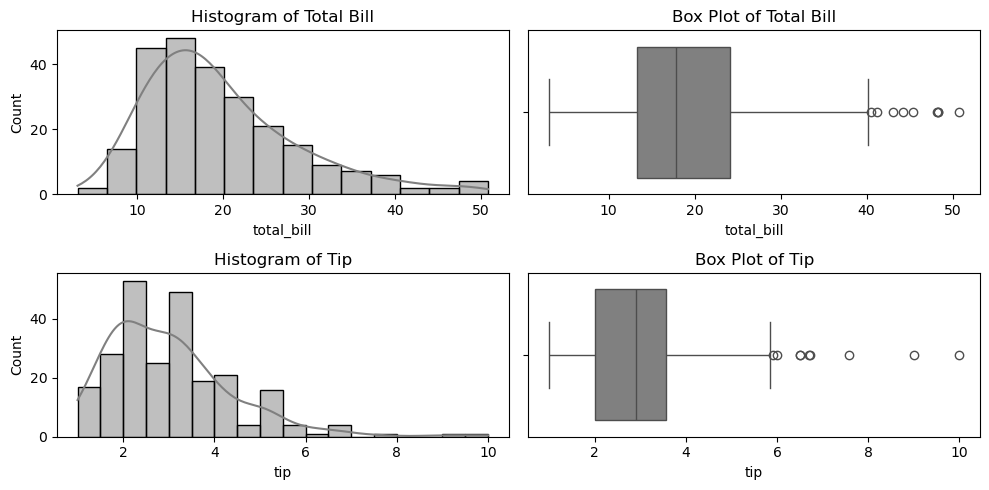

In [49]:
plt.figure(figsize=(10, 5))

# Histogram for total_bill
plt.subplot(2, 2, 1)
sns.histplot(tips['total_bill'], kde=True, color='gray')
plt.title('Histogram of Total Bill')

# Box plot for total_bill
plt.subplot(2, 2, 2)
sns.boxplot(x=tips['total_bill'], color='gray')
plt.title('Box Plot of Total Bill')

# Histogram for tip
plt.subplot(2, 2, 3)
sns.histplot(tips['tip'], kde=True, color='gray')
plt.title('Histogram of Tip')

# Box plot for tip
plt.subplot(2, 2, 4)
sns.boxplot(x=tips['tip'], color='gray')
plt.title('Box Plot of Tip')

plt.tight_layout()
plt.show()

# Both the total_bill and tip are right-skewed with some outliers.


# Question 2:  Count Plots 
- Create `count plots` for the `sex`, `smoker`, and `day` columns. 
- Interpret the results in few words: Which group is larger?

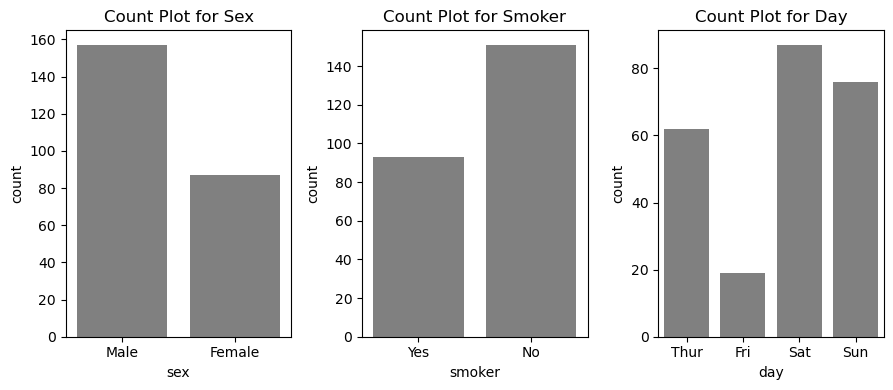

In [51]:
plt.figure(figsize=(12, 4))

# Count plot for sex
plt.subplot(1, 4, 1)
sns.countplot(x='sex', data=tips, color='gray')
plt.title('Count Plot for Sex')

# Count plot for smoker
plt.subplot(1, 4, 2)
sns.countplot(x='smoker', data=tips, color='gray')
plt.title('Count Plot for Smoker')

# Count plot for day
plt.subplot(1, 4, 3)
sns.countplot(x='day', data=tips, color='gray')
plt.title('Count Plot for Day')

plt.tight_layout()
plt.show()

# More male customers than female customers.
# More non-smokers than smokers among the customers.
# Saturday has the highest number of visits, followed by Sunday, then Thursday, with Friday having the lowest number of visits.


# Question 3: Scatter Plot
- Create a scatter plot to visualize the relationship between `total_bill` and `tip`. 
- Interpret the plot: Do we see any correlation?

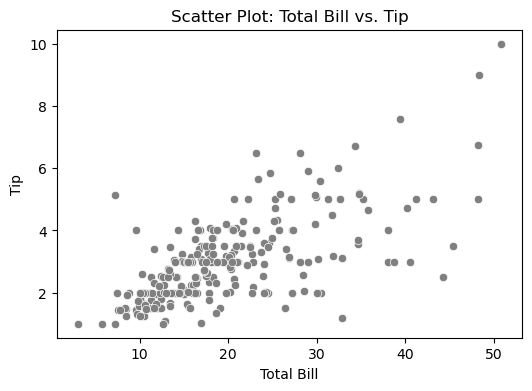

In [53]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='total_bill', y='tip', data=tips, color='gray')
plt.title('Scatter Plot: Total Bill vs. Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

# The scatter plot shows a positive correlation, as the total bill increases, the tip also tends to increase.


# Question 4: Pair Plots 
- Create pair plots to visualize relationships between: (`total_bill`, `tip, size`). 
- Interpret the plot.

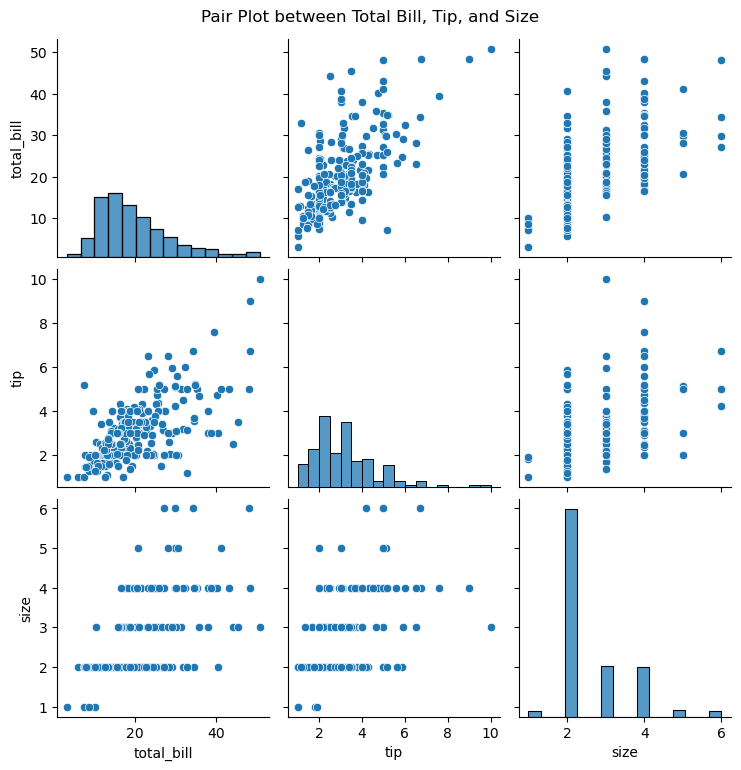

In [57]:
sns.pairplot(tips[['total_bill', 'tip', 'size']])
plt.suptitle('Pair Plot between Total Bill, Tip, and Size', y=1.02)
plt.show()

# There is a positive correlation between total_bill and tip, which means that as the total bill increases, the tip also increases.
# In the pair plot between total_bill and size, we see grouped dots that increase as the size increases, which suggests that as the number of people in a group grows, the total bill tends to increase as well.
# Similarly, for the plot between tip and size, we also observe grouped dots that increase with the size. Larger groups tend to leave larger tips, reflecting the fact that larger bills are likely to result in higher tips.


# Question 5: Linear Regression with SKlearn
- Build a simple linear regression model to predict `tip` from `total_bill` using scikit-learn. 
- Calculate and interpret the `R-squared` value, and `MSE` for both the <b><font color='red'> training and testing sets</b></font>. 
- Generate a `residual` plot (using the testing dataset: y_test - y_pred) and analyze its distribution. 
- Interpret the `slope` and `intercept` of the regression line.
- Split the dataset into `70% for model training` and `30% for testing the model` 


Training Set:
R-squared: 0.4701717097737157
MSE: 1.106171289541221

Testing Set:
R-squared: 0.40892759088449826
MSE: 0.8808685298983084


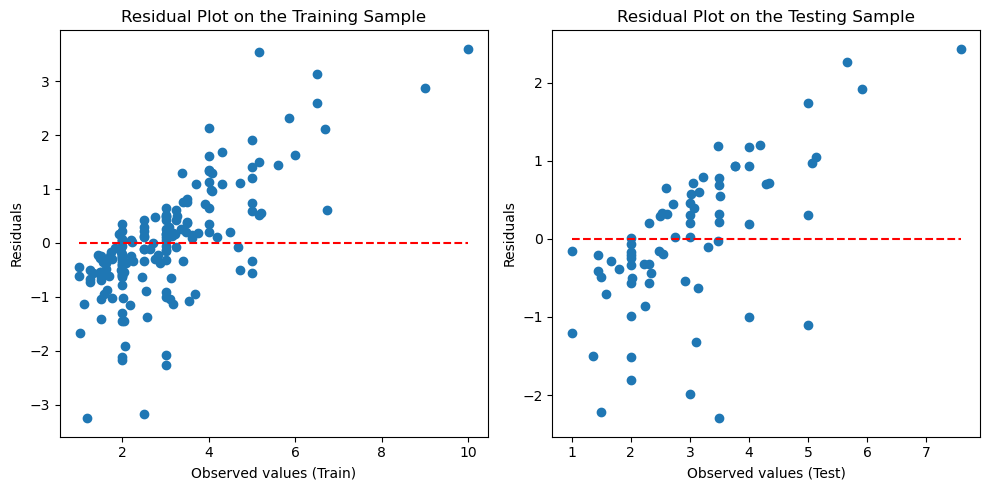


Slope: 0.10976739499225245
Intercept: 0.8195831449461828


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset and prepare the data
X = tips[['total_bill']]  # Independent variable (total_bill)
y = tips['tip']  # Dependent variable (tip)

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

# Initialize the linear regression model
model = LinearRegression()

# Train the model with the training set
model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared and MSE for both training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Print results
print("Training Set:")
print(f"R-squared: {train_r2}")
print(f"MSE: {train_mse}")

print("\nTesting Set:")
print(f"R-squared: {test_r2}")
print(f"MSE: {test_mse}")

# Generate residual plots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train - y_train_pred)
plt.hlines(y=0, xmin=min(y_train), xmax=max(y_train), color='red', linestyle='--')
plt.title('Residual Plot on the Training Sample')
plt.xlabel('Observed values (Train)')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test - y_test_pred)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), color='red', linestyle='--')
plt.title('Residual Plot on the Testing Sample')
plt.xlabel('Observed values (Test)')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Print Slope and Intercept
print("\nSlope:", model.coef_[0])
print("Intercept:", model.intercept_)

# R² is moderately low (about 40-47%) for both training and testing sets, indicating that the total bill does not fully predict the tip.
# The MSE values are reasonably close, suggesting that the model’s prediction errors are somewhat consistent across both training and testing sets.
# Testing performance is slightly worse than the training performance, which is common when a model performs well on training data but struggles to generalize to unseen data.

# In a well-behaved linear regression model, the residuals should ideally be randomly scattered around zero.
# The positive correlation of residuals in both the training and testing plots suggests that the linear model might not be the best fit for the data.
# A common solution to this issue is to transform the data or apply a non-linear model, like polynomial regression, or use logarithmic transformations on the independent or dependent variables to stabilize the variance of the residuals.
#  Also, addressing potential outliers or leveraging robust regression methods can help reduce the residuals' correlation and improve the model's performance.

# The slope of 0.1098 means that if the total bill increases by 1, the tip is expected to increase by 0.1098.
# The intercept of 0.8196 means that when the total bill is 0, the predicted tip would be approximately 0.82.


# Question 6: Multiple Linear Regression Model
- Build a multiple linear regression model to predict `tip` using `total_bill`, `size`, `sex`, `smoker`, and `day`. 
- Use the same split as above (`70% for training` and `30% for testing`).
- Evaluate the model's performance using the same metrics as in the simple linear regression (`R^2` & `MSE`).
- Compare the performance of the `simple` and `multiple` linear regression models.

In [111]:
# Separate numeric columns
numeric_col = tips[['total_bill', 'tip', 'size']]

# One-hot encode categorical features
tips_cate_encoded = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Convert boolean values (True/False) to integers (1/0)
categorical_col = tips_cate_encoded[['sex_Female', 'smoker_No', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Dinner']]
categorical_col = categorical_col.astype(int)

# Combine numeric columns with the encoded categorical columns
tips_encoded = pd.concat([numeric_col, categorical_col], axis=1)

# Print the final encoded DataFrame
print(tips_encoded.head())


# Define the independent variables (X_multi) and dependent variable (y)
X_multi = tips_encoded[['total_bill', 'size', 'sex_Female', 'smoker_No', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Dinner']]
y = tips_encoded['tip']

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.3, random_state=41)

# Initialize the linear regression model
model_multi = LinearRegression()

# Train the model with the training set
model_multi.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = model_multi.predict(X_train)
y_test_pred = model_multi.predict(X_test)

# Calculate R-squared and MSE for both training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Print Model metrics (MSE & R^2) on Training and Testing dataset
print("\nModel metrics (MSE & R^2) on Training Dataset:")
print(f"R-squared: {train_r2}")
print(f"MSE: {train_mse}")

print("\nModel metrics (MSE & R^2) on Testing Dataset:")
print(f"R-squared: {test_r2}")
print(f"MSE: {test_mse}")


# The model seems to be performing better on the training data (higher R² and lower MSE) compared to the testing data. This suggests the model might be overfitting to the training set and not generalizing well to new, unseen data.
# Coampare with simple linear regression model:
# The multiple linear regression model performs slightly better on the training dataset compared to the simple model, with a higher R-squared (48.76%) and slightly lower MSE (1.0698). This suggests that adding more features helps the model better capture the patterns in the training data.
# The difference in performance between the two models on the testing set is minimal. The simple linear regression model has a slightly better R² and MSE, indicating that it generalizes slightly better to unseen data.
# Feature selection or dimensionality reduction techniques (like Lasso or Ridge regression) might help improve the multiple model's generalization ability.


   total_bill   tip  size  sex_Female  smoker_No  day_Fri  day_Sat  day_Sun  \
0       16.99  1.01     2           1          1        0        0        1   
1       10.34  1.66     3           0          1        0        0        1   
2       21.01  3.50     3           0          1        0        0        1   
3       23.68  3.31     2           0          1        0        0        1   
4       24.59  3.61     4           1          1        0        0        1   

   time_Dinner  
0            1  
1            1  
2            1  
3            1  
4            1  

Model metrics (MSE & R^2) on Training Dataset:
R-squared: 0.4876127709718179
MSE: 1.0697579807157669

Model metrics (MSE & R^2) on Testing Dataset:
R-squared: 0.4028480049283656
MSE: 0.8899288681258749


# Question 7: Regularization
- Apply `StandardScaler` on the datasets.
- Check which alpha parameter is the `optimal value` among [0.1, 1, 10, 100, 200]
- Apply `Ridge` Linear Regression with the `best alpha` value.
- What is your conclusion?

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Standardize the data (Important for Ridge regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_multi)

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=41)

# Initialize alpha values to test
alpha_values = [0.1, 1, 10, 100, 200]

# Initialize variables to track the best alpha value based on test MSE
best_alpha = None
best_mse = float('inf')

# Test Ridge Regression for each alpha value
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = ridge_model.predict(X_train)
    y_test_pred = ridge_model.predict(X_test)
    
    # Calculate Mean Squared Error for both training and testing sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Track the best alpha based on testing MSE
    if test_mse < best_mse:
        best_mse = test_mse
        best_alpha = alpha

# Apply Ridge Regression with the best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)

# Make predictions on both the training and test sets using the best model
y_train_pred_best = ridge_best.predict(X_train)
y_test_pred_best = ridge_best.predict(X_test)

# Calculate R-squared and MSE for both training and test sets
train_r2 = r2_score(y_train, y_train_pred_best)
train_mse_best = mean_squared_error(y_train, y_train_pred_best)

test_r2 = r2_score(y_test, y_test_pred_best)
test_mse_best = mean_squared_error(y_test, y_test_pred_best)

# Print the results
print(f"Optimal alpha: {best_alpha}")
print(f"Training Set - MSE: {train_mse_best}")
print(f"Training Set - R²: {train_r2}")
print(f"Test Set - MSE: {test_mse_best}")
print(f"Test Set - R²: {test_r2}")

# Compare the Ridge Regression model and the Multiple Linear Regression model:
# Training Set Performance: Both models perform almost equally well on the training set, as their R² and MSE are very similar.
# Test Set Performance: Ridge Regression performs slightly better on the test set.
# Ridge Regression with optimal alpha = 10 is slightly better at generalizing to the test data than Multiple Linear Regression.
# So, Ridge Regression seems to be the better model for generalizing to unseen data based on these results.


Optimal alpha: 10
Training Set - MSE: 1.0725850494853413
Training Set - R²: 0.486258675971615
Test Set - MSE: 0.8816659497408234
Test Set - R²: 0.4083925134564895
